In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import numpy as np
%matplotlib inline

In [32]:
# Define the folder path
data_dir = Path(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-casestudy\data')
print('Data path:',data_dir)

Data path: C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-casestudy\data


In [33]:
# Find all CSV files (including subfolders)
csv_files = list(data_dir.rglob('*.csv'))
print(f"Found {len(csv_files)} CSV files:\n")

if csv_files:
    for file in csv_files:
        print(f"- {file.name}")
else:
    print("Current folder doen't have any .CSV files")

Found 5 CSV files:

- bank-additional-full-processed.csv
- bank-full.csv
- bank.csv
- bank-additional-full.csv
- bank-additional.csv


In [34]:
# Selection of the file to be considered
bank_additional_data_full = Path(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-condaforge\data\bank-additional\bank-additional-full.csv')
bank_additional_data = Path(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-condaforge\data\bank-additional\bank-additional.csv')
bank_data_full = Path(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-condaforge\data\bank\bank-full.csv')
bank_data = Path(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-condaforge\data\bank\bank.csv')


In [35]:
# Display the first few rows of the dataset
df1 = pd.read_csv(bank_additional_data_full, sep=';')
df2 = pd.read_csv(bank_additional_data, sep=';')
df3 = pd.read_csv(bank_data_full, sep=';')
df4 = pd.read_csv(bank_data, sep=';')

#print('size of bank dataset:', df1.shape)
print(f'Size of bank datasets: df1: {df1.shape}, df2: {df2.shape}, df3: {df3.shape}, df4: {df4.shape}')
# Display the first few rows of the dataset
#df1.head(); df2.head(); df3.head(); df4.head()

#print(df.head())

Size of bank datasets: df1: (41188, 21), df2: (4119, 21), df3: (45211, 17), df4: (4521, 17)


Based on size of data set for each .CSV file.

Selecting which dataset has more attributes and records.

The dataset with the most attributes and records is the one we will use for our analysis.

In this case, it is the bank-additional-full.csv file.


In [36]:
# selected the more attributes dataset i.e bank-additional-full.csv
# Display the first few rows of the dataset
df = pd.read_csv(bank_additional_data_full, sep=';')
print('size of data set:', df.shape ,'\n')
df.head()
#print(df.head())

size of data set: (41188, 21) 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
# identify the features
print('statiscal description of the dataset:')
df.describe()

statiscal description of the dataset:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [38]:
print('Dataframe infos :\n')
df.info()

Dataframe infos :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

In [39]:
# missing values
#print("Missing values in each column:\n", df.isnull().sum())
df.isnull().sum() # Total number of missing values in the DataFrame

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [40]:
#data types for original data
original_dtypes = df.dtypes
print("Original data types:\n", original_dtypes)

Original data types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


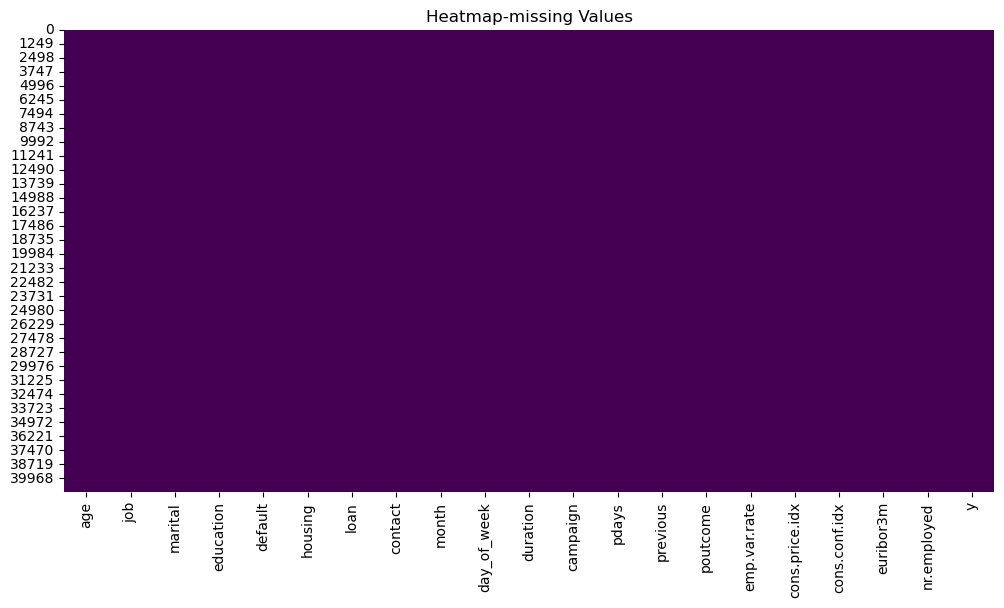

In [41]:
# Visualize missig values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap-missing Values')
plt.show()

In [42]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool


In [43]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Display duplicate rows
df[df.duplicated(keep=False)]

Number of duplicate rows: 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [44]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

#check duplicates again
df[df.duplicated(keep=False)]
print(df.shape)
df.head()

Number of duplicate rows after dropping: 0
(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Convert columns back to original data types
for col, dtype in original_dtypes.items():
    df[col] = df[col].astype(dtype)




# Modified df saved to a new CSV file
output_file = r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-condaforge\data\processed-data\'bank-additional-full-processed.csv'
#df.to_csv(output_file, sep=';', index=False)
df.to_csv(output_file, index=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
print(df.shape)
print(df.describe())

(41176, 21)
               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       

Visuliaze the Outliners information

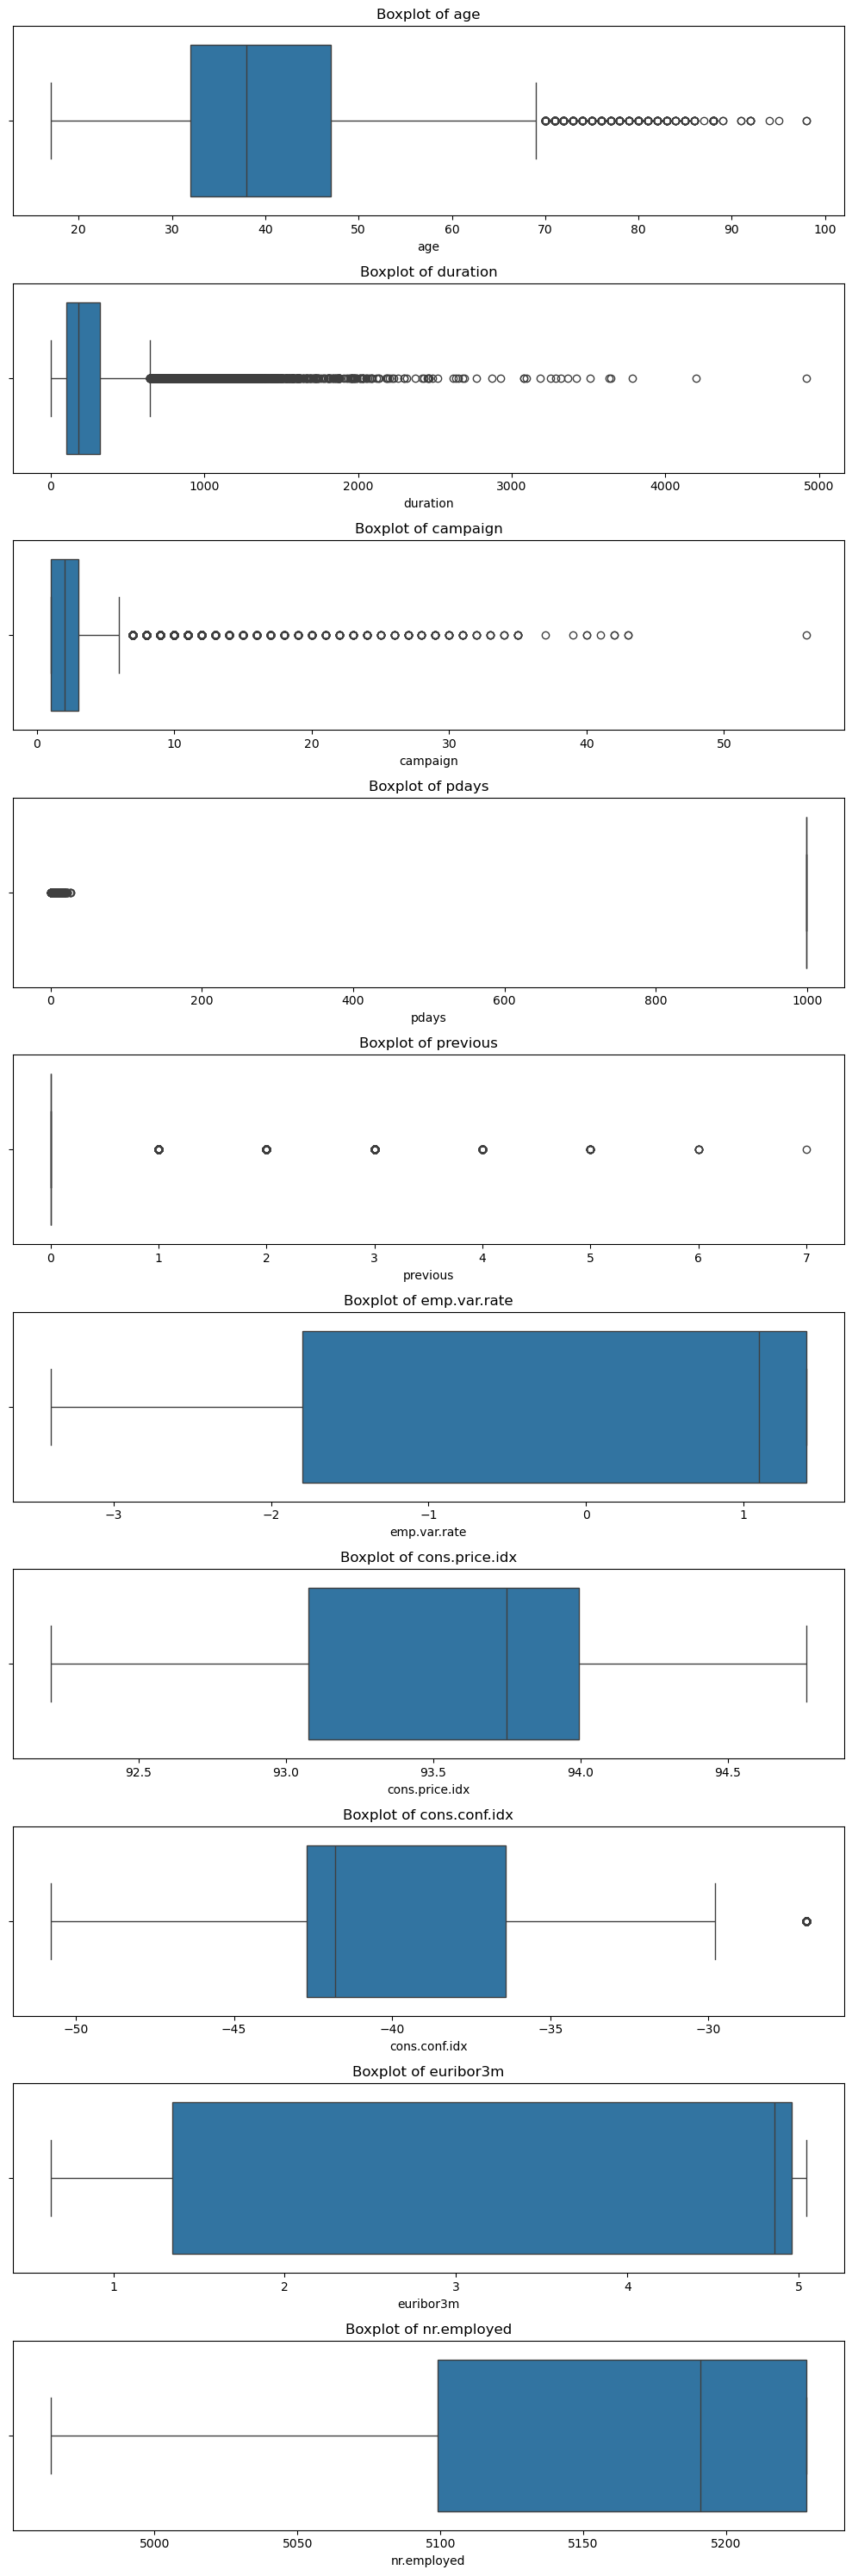

In [46]:
# Get all numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Create a figure with multiple subplots for numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 3*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Layout to avoid overlap
fig.tight_layout()
plt.show()

In [47]:
# Check for outliers using z-score
numeric_outliers_cols = df.select_dtypes(include=[np.number]).columns
z_scores_before = np.abs(stats.zscore(df[numeric_outliers_cols]))
outliers_before = (z_scores_before > 3).sum(axis=0)
print("Number of outliers in each numeric column before adjustment:\n", outliers_before, '\n')

Number of outliers in each numeric column before adjustment:
 [ 369  861  869 1515 1064    0    0    0    0    0] 



In [48]:
MAX_ITERATIONS = 15

# outlier replace using Z-score method with median
for i in range(1, MAX_ITERATIONS + 1):
    total_corrected_outliers = 0

    for column in numeric_outliers_cols:
        z_scores = np.abs(stats.zscore(df[column]))
        is_outlier = z_scores > 3
        num_outliers = is_outlier.sum()

        if num_outliers > 0:
            median_non_outliers = df.loc[~is_outlier, column].median()
            df.loc[is_outlier, column] = median_non_outliers # median value
            print(f"{num_outliers} outliers in '{column}' replaced with median: {median_non_outliers:.2f}")
            total_corrected_outliers += num_outliers

    # no outliers detected
    if total_corrected_outliers == 0:
        print("Loop exit due to no further outliers are detected.")
        break

# Check for outliers again after modified
z_scores_after = np.abs(stats.zscore(df[numeric_outliers_cols]))
outliers_after = (z_scores_after > 3).sum(axis=0)
print("Number of outliers in each numeric column after modification:\n", outliers_after)

369 outliers in 'age' replaced with median: 38.00
861 outliers in 'duration' replaced with median: 176.00
869 outliers in 'campaign' replaced with median: 2.00
1515 outliers in 'pdays' replaced with median: 999.00
1064 outliers in 'previous' replaced with median: 0.00
133 outliers in 'age' replaced with median: 38.00
886 outliers in 'duration' replaced with median: 176.00
908 outliers in 'campaign' replaced with median: 2.00
691 outliers in 'duration' replaced with median: 176.00
629 outliers in 'campaign' replaced with median: 2.00
517 outliers in 'duration' replaced with median: 176.00
979 outliers in 'campaign' replaced with median: 2.00
396 outliers in 'duration' replaced with median: 176.00
298 outliers in 'duration' replaced with median: 176.00
225 outliers in 'duration' replaced with median: 176.00


C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellatio

163 outliers in 'duration' replaced with median: 176.00
113 outliers in 'duration' replaced with median: 176.00
72 outliers in 'duration' replaced with median: 176.00
62 outliers in 'duration' replaced with median: 176.00
33 outliers in 'duration' replaced with median: 176.00
38 outliers in 'duration' replaced with median: 176.00
14 outliers in 'duration' replaced with median: 176.00


C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Roy\AppData\Local\Temp\ipykernel_2036\1963482380.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellatio

8 outliers in 'duration' replaced with median: 176.00
Number of outliers in each numeric column after modification:
 [0 0 0 0 0 0 0 0 0 0]


In [49]:
# Modified df saved to a new CSV file
output_file = r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-casestudy\data\processed-data\bank-additional-full-processed.csv'
df.to_csv(output_file, sep=';', index=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Target variable 'y' distribution:
 y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


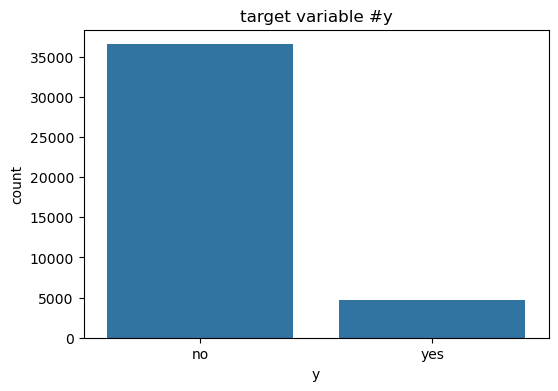

In [67]:
# Select preprocessed data for analysis
df = pd.read_csv(r'C:\Users\Roy\Documents\VisualCode\Python\bank-prediction-casestudy\data\processed-data\bank-additional-full-processed.csv', sep=';')
#print(df.head())
#print(df.describe())
#print(df.shape)
#df.info()

# Check the target variable distribution
print("Target variable 'y' distribution:\n", df['y'].value_counts(normalize=True))
#df['y'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title("target variable #y")
plt.show()

age           NaN
job           NaN
marital       NaN
education     NaN
default       NaN
housing       NaN
loan          NaN
contact       NaN
month         NaN
day_of_week   NaN
Name: y, dtype: float64 

campaign         NaN
pdays            NaN
previous         NaN
poutcome         NaN
emp.var.rate     NaN
cons.price.idx   NaN
cons.conf.idx    NaN
euribor3m        NaN
nr.employed      NaN
y                NaN
Name: y, dtype: float64


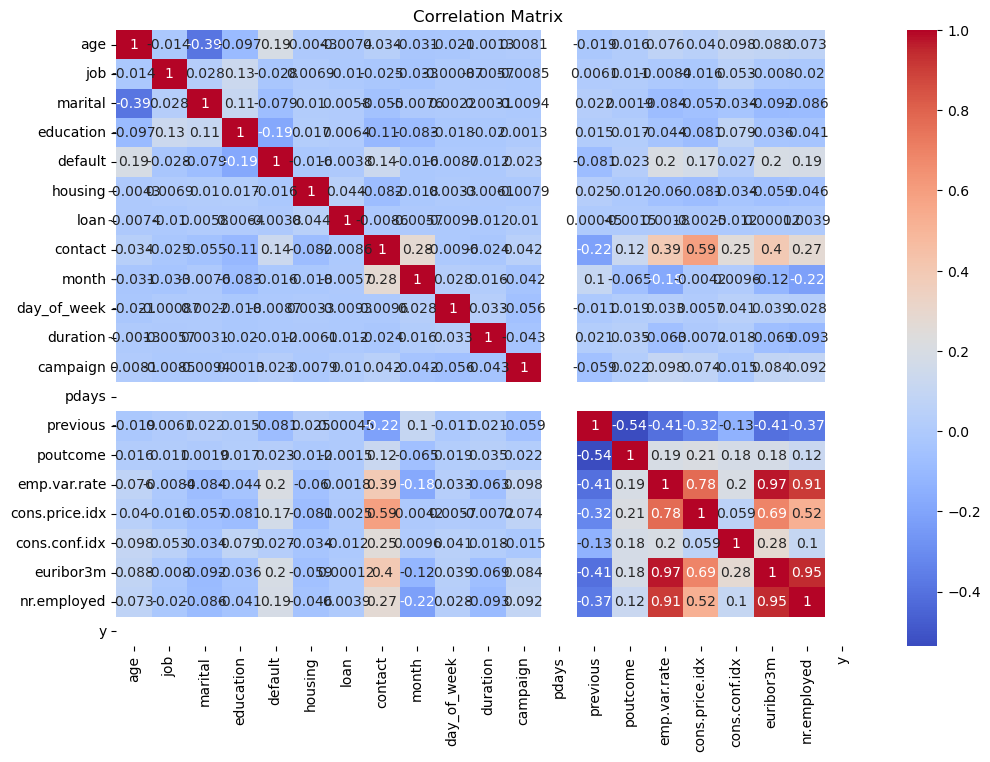

In [75]:
# correlation matrix
df_encoded = pd.get_dummies(df.drop(columns='y'))
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})
correlation = df_encoded.corr()['y'].sort_values(ascending=False)
print(correlation.head(10) ,'\n')
print(correlation.tail(10))

# Numeric 
plt.figure(figsize=(12, 8))
df['y'] = df['y'].map({'yes': 1, 'no': 0})
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

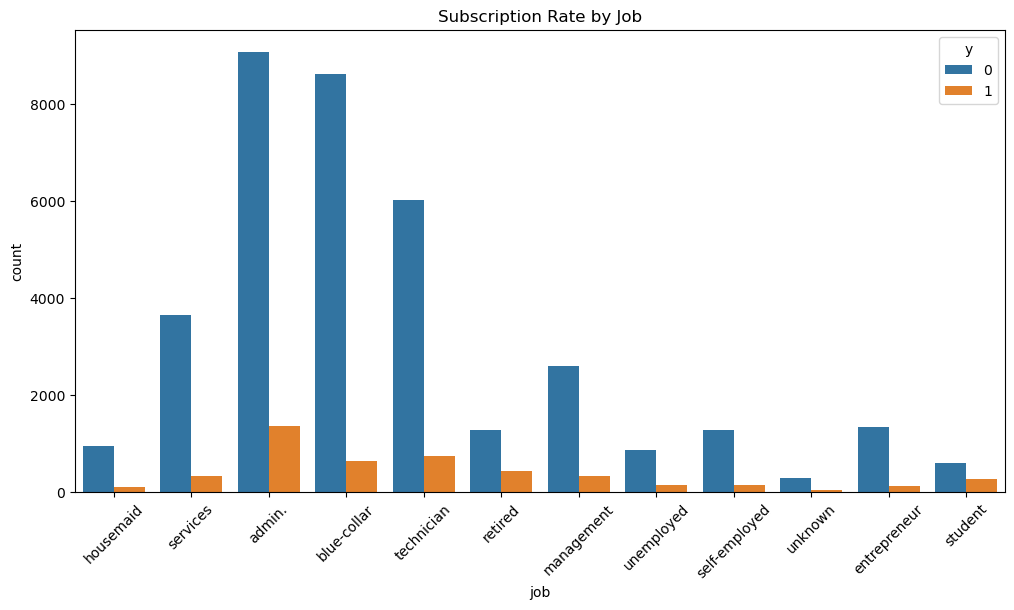

In [69]:
# Check categorical impact on 'y'
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.title("Subscription Rate by Job")
plt.xticks(rotation=45)
plt.show()